In [1]:
import pandas as pd
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

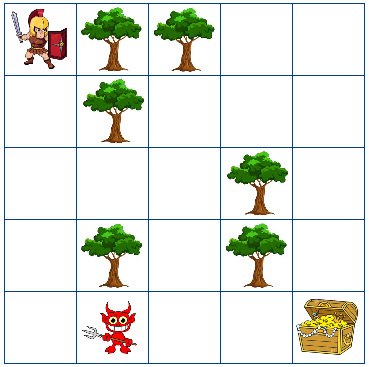

In [2]:
#Initialize gamma
gamma = 0.8
#Open the Treasure map
treasure_map  = Image.open("../data/map.png") 
width, height = treasure_map.size 
treasure_map = treasure_map.resize((int(width/2), int(height/2)))
treasure_map

In [3]:
#For Reward and Q matrices the columns are in the order (U, D, L, R, N)
# Reward for blank box 1, Tree obstacle -5, Monster -10, Treasure +10, Invalid move 0
reward_table = np.array([[0, 1, 0, -5, 1],
                   [0, -5, 1, -5, -5],
                   [0, 1, 5, 1, -5],
                   [0, 1, -5, 1, 1],
                   [0, 1, 1, 0, 1],
                   [1, 1, 0, -5, 1],
                   [-5, 1, 1, 1, -5],
                   [-5, 1, -5, 1, 1],
                   [1, -5, 1, 1, 1],
                   [1, 1, 1, 0, 1],
                   [1, 1, 0, 1, 1],
                   [-5, -5, 1, 1, 1],
                   [1, 1, 1, -5, 1],
                   [1, -5, 1, 1, -5],
                   [1, 1, -5, 0, 1],
                   [1, 1, 0, -5, 1],
                   [1, -10, 1, 1, -5],
                   [1, 1, -5, -5, 1],
                   [-5, 1, 1, 1, -5],
                   [1, 10, -5, 0, 1],
                   [1, 0, 0, -10, 1],
                   [-5, 0, 1, 1, -10],
                   [1, 0, -10, 1, 1],
                   [-5, 0, 1, 10, 1],
                   [1, 0, 1, 0, 10]
                  ])

In [4]:
#Initialize the Q-table with all Zeros
q_table = np.zeros((25,5))

In [5]:
#Initialize the transition matrix
transition_table = np.array([[-1, 5, -1, 1, 0],
                       [-1, 6, 0, 2, 1],
                       [-1, 7, 1, 3, 2],
                       [-1, 8, 2, 4, 3],
                       [-1, 9, 3, -1, 4],
                       [0, 10, -1, 6, 5],
                       [1, 11, 5, 7, 6],
                       [2, 12, 6, 8, 7],
                       [3, 13, 7, 9, 8],
                       [4, 14, 8, -1, 9],
                       [5, 15, -1, 11, 10],
                       [6, 16, 10, 12, 11],
                       [7, 17, 11, 13, 12],
                       [8, 18, 12, 14, 13],
                       [9, 19, 13, -1, 14],
                       [10, 20, -1, 16, 15],
                       [11, 21, 15, 17, 16],
                       [12, 22, 16, 18, 17],
                       [13, 23, 17, 19, 18],
                       [14, 24, 18, -1, 19],
                       [15, -1, -1, 21, 20],
                       [16, -1, 20, 22, 21],
                       [17, -1, 21, 23, 22],
                       [18, -1, 22, 24, 23],
                       [19, -1, 23, -1, 24]
                        ])

In [6]:
#Initialize the action
# 0-up, 1-down, 2-left, 3-right, 4-No action
action_table = np.array([[1, 3, 4],
                   [1, 2, 3, 4],
                   [1, 2, 3, 4],
                   [1, 2, 3, 4],
                   [1, 2, 4],
                   [0, 1, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 4],
                   [0, 1, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 4],
                   [0, 1, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 4],
                   [0, 3, 4],
                   [0, 2, 3, 4],
                   [0, 2, 3, 4],
                   [0, 2, 3, 4],
                   [0, 2, 4]])

In [7]:
for i in range(500):
    start = 0
    current = start
    
    while current != 24:
        action = random.choice(action_table[current])
        next_state = transition_table[current][action]
        future_reward = []
        
        for action_next in action_table[next_state]:
            future_reward.append(q_table[next_state][action_next])
        
        q_state = reward_table[current][action] + gamma*max(future_reward)
        q_table[current][action] = q_state
        
        current = next_state

In [8]:
q_table

array([[ 0.        ,  6.048576  ,  0.        , -0.32891136,  5.8388608 ],
       [ 0.        ,  0.31072   ,  5.8388608 ,  2.73687091, -0.32891136],
       [ 0.        ,  6.6384    ,  9.67108864,  6.6384    ,  2.73687091],
       [ 0.        ,  7.048     ,  2.73687091,  7.048     ,  6.6384    ],
       [ 0.        ,  7.56      ,  6.6384    ,  0.        ,  7.048     ],
       [ 5.8388608 ,  6.31072   ,  0.        ,  0.31072   ,  6.048576  ],
       [-0.32891136,  6.6384    ,  6.048576  ,  6.6384    ,  0.31072   ],
       [ 2.73687091,  7.048     ,  0.31072   ,  7.048     ,  6.6384    ],
       [ 6.6384    ,  1.56      ,  6.6384    ,  7.56      ,  7.048     ],
       [ 7.048     ,  8.2       ,  7.048     ,  0.        ,  7.56      ],
       [ 6.048576  ,  6.048576  ,  0.        ,  6.6384    ,  6.31072   ],
       [ 0.31072   ,  1.048     ,  6.31072   ,  7.048     ,  6.6384    ],
       [ 6.6384    ,  7.56      ,  6.6384    ,  1.56      ,  7.048     ],
       [ 7.048     ,  2.2       ,  7.0

In [9]:
#Convert to dataframe for conevniently finding ot the route
q_df = pd.DataFrame(q_table)
q_df

,0,1,2,3,4
0,0.000000,6.048576,0.000000,-0.328911,5.838861
1,0.000000,0.310720,5.838861,2.736871,-0.328911
2,0.000000,6.638400,9.671089,6.638400,2.736871
3,0.000000,7.048000,2.736871,7.048000,6.638400
4,0.000000,7.560000,6.638400,0.000000,7.048000
5,5.838861,6.310720,0.000000,0.310720,6.048576
6,-0.328911,6.638400,6.048576,6.638400,0.310720
7,2.736871,7.048000,0.310720,7.048000,6.638400
8,6.638400,1.560000,6.638400,7.560000,7.048000
9,7.048000,8.200000,7.048000,0.000000,7.560000


In [10]:
#Print out the optimal route referring the final Q-table and Transition matrices
route = []
state = 0
while state != 24:
    route.append(state)
    row = q_df.iloc[state]
    direction = row.idxmax(axis=1)
    state = transition_table[state][direction]
route.append(state)

In [11]:
route

[0, 5, 10, 11, 12, 17, 22, 23, 24]

#### The Optimal Route to Treasure:
    - On refering to the actual map given above and the route that was discovered, the final map with route would 
    like like below:

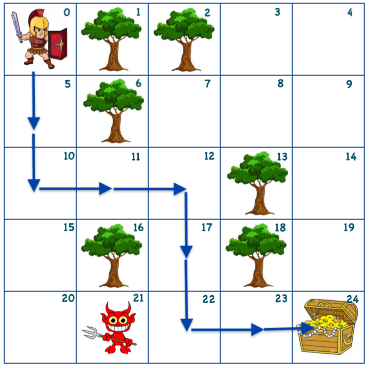

In [12]:
final_map  = Image.open("../data/final_map.png") 
final_map.resize((int(width/2), int(height/2)))